# PL: Ceny Srebra
# ENG: SILVER PRICES

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import quandl
import matplotlib.pyplot as plt
import math as math
import os 
import plotly.express as px
%matplotlib inline

In [2]:
#Opcje wyswietlania wyników biblioteki pandas
#Display options
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)

In [3]:
#Pobieranie danych ze strony quandl.com przy pomocy kluczu API
#Dowlading data from quandl.com with API key
SilverPrice = quandl.get("LBMA/SILVER", authtoken="jJLD2gkVUNrszRRebz2U",start_date = "2010-01-01")
SilverPrice.tail()


USD    GBP   EURO
Date                            
2020-05-01  14.845  11.83  13.52
2020-05-04  14.930  12.03  13.66
2020-05-05  14.750  11.85  13.61
2020-05-06  15.075  12.18  13.95
2020-05-07  14.980  12.11  13.88

In [4]:

#Usuwanie zbędnych kolumn
#Deleting other columns
SilverPrice = SilverPrice.iloc[: , [0]].copy() 
SilverPrice.dropna(subset = ["USD"], inplace=True)
SilverPrice.tail()



USD
Date              
2020-05-01  14.845
2020-05-04  14.930
2020-05-05  14.750
2020-05-06  15.075
2020-05-07  14.980

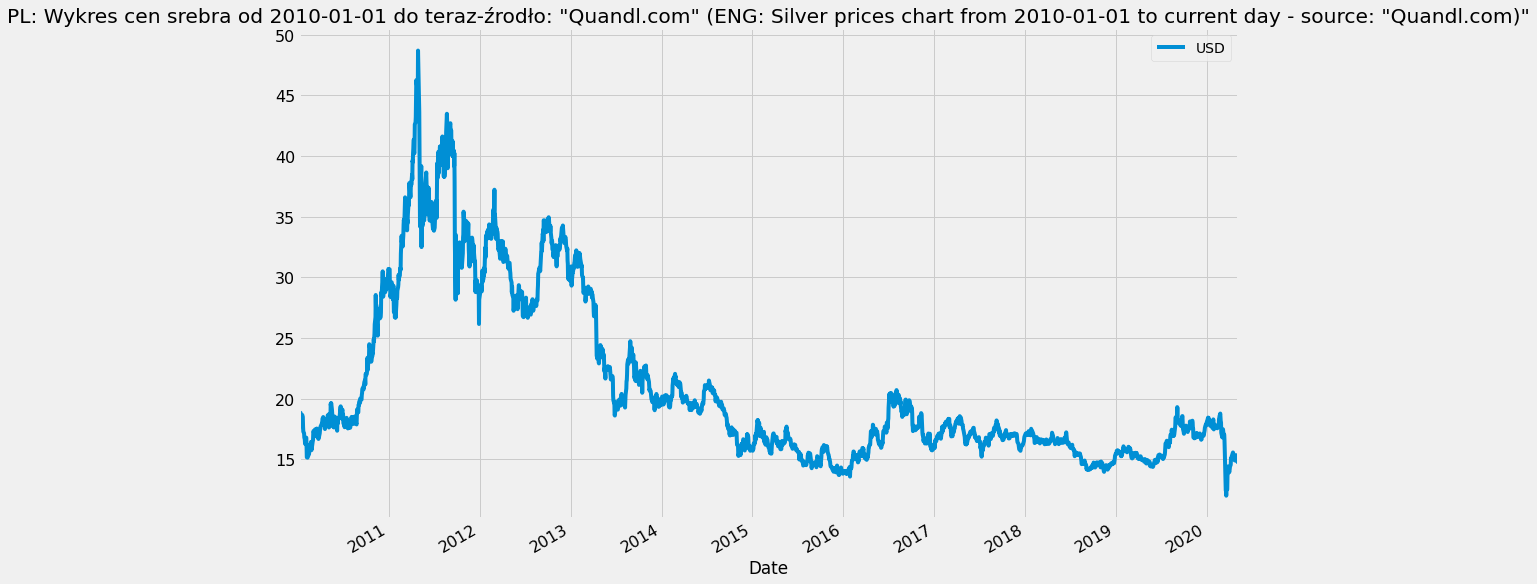

In [5]:
#Wyswietlanie danych na wykresie przy pomocy biblioteki plotly.express
#Displaying data in graph with plotly.express
plt.style.use('fivethirtyeight')
SilverPrice.plot(title= "PL: Wykres cen srebra od 2010-01-01 do teraz-źrodło: \"Quandl.com\""+" (ENG: Silver prices chart from 2010-01-01 to current day - source: \"Quandl.com)\"",
            figsize=(15,10),grid=True,fontsize=16)

# PL: Przewidywanie cen Srebra z Prophet
# ENG:Predictions Silver Prices with Prophet

In [6]:
#Resetowanie indexu
#Reset index
df = SilverPrice.reset_index()

#Zmiana nazwy kolumn dla biblioteki prophet
#Rename columns for prophet library
df = df.rename(columns={'Date': 'ds', 'USD': 'y'})

#Wyswietlanie ramki danych df
#Display Data Frame df
df.head()

ds      y
0 2010-01-04  17.17
1 2010-01-05  17.57
2 2010-01-06  17.89
3 2010-01-07  18.09
4 2010-01-08  18.12

In [7]:
#Importowanie biblioteki Prophet
#Import Prophet library
from fbprophet import Prophet

#Inicjowanie nowego objektu Prophet
#Instantiating a new Prophet object
m = Prophet(daily_seasonality=True)

#Wywołanie metody dopasowania obiektu i wprowadzenie jej w ramke danych df
#Call object's fit method and pass in the historical dataframe
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [8]:
#Dodanie przyszłych dat do kolumny "ds"
#Extend the "ds" column with forecast
future = m.make_future_dataframe(freq='D',periods=365)
future.tail()

ds
2975 2021-05-03
2976 2021-05-04
2977 2021-05-05
2978 2021-05-06
2979 2021-05-07

In [9]:
#Przypisane przewidywanych danych
#Assign predicted values
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
2975 2021-05-03  16.378056    9.410061   23.809245
2976 2021-05-04  16.357532    9.448182   23.562100
2977 2021-05-05  16.304126    9.304940   23.434555
2978 2021-05-06  16.245100    8.783017   23.480610
2979 2021-05-07  16.121500    8.821900   23.826652

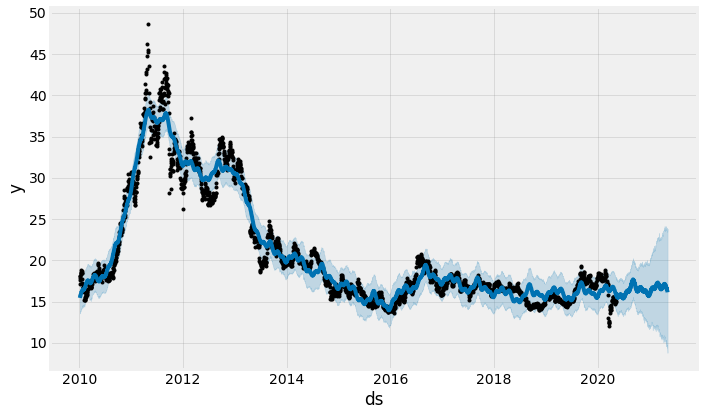

In [10]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig1 = m.plot(forecast)

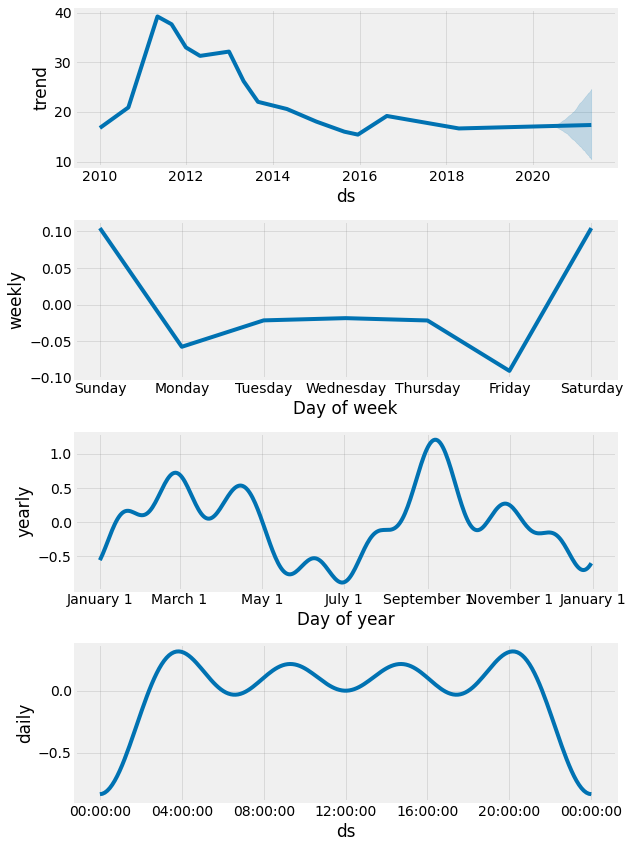

In [11]:
#Wyswietlanie grafu z przewidywanymi wartosciami 
#Show a plot with the forecast
fig2 = m.plot_components(forecast)

In [14]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
#Dodanie lini trendu to wykresu
#Add trendline to plot
fig = plot_plotly(m, forecast,trend=True)

indicator="Silver"

#Dodanie lini trendu to wykresu
#Add trendline to plot
fig.update_layout(
    title=indicator + " - ceny od 2010 do teraz, źrodło:\"Quandl.com\"" +'<br>'+ indicator+" price from 2010-current, source:\"Quandl.com\"", title_x=0.5,
    xaxis_title="Data (Date)",
    yaxis_title="Cena (Price)",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#242151"
    )
)
py.iplot(fig)

In [15]:
#Złączanie dwóch ramek danych 
#Merge two Data Frames (imported from .csv file and forecast) on date column ('ds')
df2 = df.merge(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']],sort=True,on=['ds'],how="outer")

#Zmiana nazwy  kolumn
#Rename the columns title
df2 = df2.rename(columns={'ds': 'Date', 'y': 'Index','yhat': 'Forecast',
                          'yhat_lower': 'Forecast_(lower)','yhat_upper': 'Forecast_(upper)'})

#Wyswietlanie pierwszych pozycji w ramce danych
#Display header
df2.tail(15)

Date  Index   Forecast  Forecast_(lower)  Forecast_(upper)
2965 2021-04-23    NaN  16.825363         10.017251         23.675199
2966 2021-04-24    NaN  16.984885         10.161589         24.090726
2967 2021-04-25    NaN  16.945808          9.586284         24.142558
2968 2021-04-26    NaN  16.741285          9.773410         23.799845
2969 2021-04-27    NaN  16.731846         10.344524         23.752398
2970 2021-04-28    NaN  16.686632          9.892363         23.880570
2971 2021-04-29    NaN  16.632788          9.778433         23.716913
2972 2021-04-30    NaN  16.511269          9.597223         23.614122
2973 2021-05-01    NaN  16.651934          9.790026         23.806009
2974 2021-05-02    NaN  16.596420          9.512121         23.955107
2975 2021-05-03    NaN  16.378056          9.410061         23.809245
2976 2021-05-04    NaN  16.357532          9.448182         23.562100
2977 2021-05-05    NaN  16.304126          9.304940         23.434555
2978 2021-05-06    NaN  16.245100          8.783017         23.480610
2979 2021-05-07    NaN  16.121500          8.821900         23.826652

In [16]:
#Obliczanie średniej dla kazdej kolumny
#Calculation of mean for every column
meanIndex = df2['Index'].mean()
meanForecast = df2['Forecast'].mean()
meanForecastLower = df2['Forecast_(lower)'].mean()
meanForecastUpper = df2['Forecast_(upper)'].mean()

#Słownik dla wartosci średnich
#Dictionary with mean values
meanDict = ({'Index': meanIndex, 'Forecast': meanForecast,
            'Forecast_(Lower)': meanForecastLower, 'Forecast_(Upper)': meanForecastUpper})
#Wyswietlanie średnich wartości
#Display mean
print('Mean: ')
meanDict

Mean: 


{'Index': 20.93691395793497,
 'Forecast': 20.382761381967168,
 'Forecast_(Lower)': 18.231683063725953,
 'Forecast_(Upper)': 22.538542468775404}

In [17]:
#Maksymalne wartosci
#Max values
maxIndex = df2['Index'].max()
maxForecast = df2['Forecast'].max()
maxForecastLower = df2['Forecast_(lower)'].max()
maxForecastUpper = df2['Forecast_(upper)'].max()

#Słownik dla wartosci maksymalnych
#Dictionary with max values
maxDict = ({'Index': maxIndex, 'Forecast': maxForecast,
            'Forecast_(Lower)': maxForecastLower, 'Forecast_(Upper)': maxForecastUpper})
#Wyswietlanie maksymalnych wartości
#Display max
print('Max value: ')
maxDict

Max value: 


{'Index': 48.7,
 'Forecast': 38.25651894762456,
 'Forecast_(Lower)': 36.40463016679817,
 'Forecast_(Upper)': 40.26264439470323}

In [18]:
#Minimalne wartosci
#Min values
minIndex = df2['Index'].min()
minForecast = df2['Forecast'].min()
minForecastLower = df2['Forecast_(lower)'].min()
minForecastUpper = df2['Forecast_(upper)'].min()

#Słownik z wartosciami minimalnymi
#Dictionary with min values
minDict = ({'Index': minIndex, 'Forecast': minForecast,
            'Forecast_(Lower)': minForecastLower, 'Forecast_(Upper)': minForecastUpper})
#Wyswietlanie minimalnych wartości
#Display min
print('Min: ')
minDict

Min: 


{'Index': 12.005,
 'Forecast': 13.935757657619718,
 'Forecast_(Lower)': 8.783017138148079,
 'Forecast_(Upper)': 15.76101464851705}

In [19]:
#Wyswietlanie ile rekordow znajduje się powyzej lub ponizej przewidywanej wartosci akcji
#How many rows is above or below average predicted value
indexAboveMeanForecast = df2["Index"].between(meanForecast,maxIndex)
indexBelowMeanForecast = df2["Index"].between(minIndex,meanForecast)

In [20]:
#Wyswietlanie kiedy wystapila najmiejsza wartość
#Smallest value date
minIndex = df2.nsmallest(n=1,columns='Index')
minIndexValue = minIndex['Index'].loc[minIndex.index]
minIndexDate = minIndex['Date'].loc[minIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa wartość
#Largest value date
maxIndex = df2.nlargest(n=1,columns='Index')
maxIndexValue = maxIndex['Index'].loc[maxIndex.index]
maxIndexDate = maxIndex['Date'].loc[maxIndex.index].to_string(index=False)

#Wyswietlanie kiedy wystapila najmiejsza przewidywana wartość
#Smallest predicted value dat
minForecast = df2.nsmallest(n=1,columns='Forecast')
minForecastValue = minForecast['Forecast'].loc[minForecast.index]
minForecastDate = minForecast['Date'].loc[minForecast.index].to_string(index=False)

#Wyswietlanie kiedy wystapila największa przewidywana wartość
#Largest predicted value date
maxForecast = df2.nlargest(n=1,columns='Forecast')
maxForecastValue = maxForecast['Forecast'].loc[maxForecast.index]
maxForecastDate = maxForecast['Date'].loc[maxForecast.index].to_string(index=False)
maxForecastDate

'2011-05-04'

# PL: Podsumowanie
# ENG: SUMARRY

In [21]:
print('Średnia wartosc wynosi %f ,a średnia przewidywana wartosc wynosi %f .' % (meanIndex, meanForecast))
print('Wystąpiło %d rekordów (wartości) powyżej przewidywanej wartości.' % len(df2[indexAboveMeanForecast]))
print('Wystąpiło %d rekordów (wartości) poniżej przewidywanej wartości.' % len(df2[indexBelowMeanForecast]))
print('Najmiejsza wartość wynosi %f i miala miejsce %s .' % (minIndexValue, minIndexDate))
print('Największa wartośc wynosi %f i miała miejsce %s .' % (maxIndexValue, maxIndexDate))
print('Najmiejsza przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (minForecastValue, minForecastDate))
print('Największa przewidywana wartość wynosi %f i będzie miala miejsce %s .' % (maxForecastValue, maxForecastDate))

Średnia wartosc wynosi 20.936914 a średnia przewidywana wartosc wynosi 20.382761 .
Wystąpiło 830 rekordów (wartości) powyżej przewidywanej wartości.
Wystąpiło 1785 rekordów (wartości) poniżej przewidywanej wartości.
Najmiejsza wartość wynosi 12.005000 i miala miejsce 2020-03-19 .
Największa wartośc wynosi 48.700000 i miała miejsce 2011-04-28 .
Najmiejsza przewidywana wartość wynosi 13.935758 i będzie miala miejsce 2015-12-21 .
Największa przewidywana wartość wynosi 38.256519 i będzie miala miejsce 2011-05-04 .


In [22]:
print('The average index value is %f and the average predicted value is %f .' % (meanIndex, meanForecast))
print('There are %d rows (values) above average predicted value.' % len(df2[indexAboveMeanForecast]))
print('There are %d rows (values) below average predicted value.' % len(df2[indexBelowMeanForecast]))
print('The smallest index value is %f on %s .' % (minIndexValue, minIndexDate))
print('The largest index value is %f on %s .' % (maxIndexValue, maxIndexDate))
print('The smallest predicted value is %f on %s .' % (minForecastValue, minForecastDate))
print('The largest predicted value is %f on %s .' % (maxForecastValue, maxForecastDate))

The average index value is 20.936914 and the average predicted value is 20.382761 .
There are 830 rows (values) above average predicted value.
There are 1785 rows (values) below average predicted value.
The smallest index value is 12.005000 on 2020-03-19 .
The largest index value is 48.700000 on 2011-04-28 .
The smallest predicted value is 13.935758 on 2015-12-21 .
The largest predicted value is 38.256519 on 2011-05-04 .


# Saving DF with predictions to DB

In [23]:
#Sciezka pod ktorym folderem zapisywana jest baza danych SQLlite
#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

import sqlite3

In [24]:
#Nawiązanie połączenia z bazą danych SQLLite (predictions)
#Connecting with database
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

In [25]:
#Tworzenie tabeli w bazie
# Creating a table
c.execute('CREATE TABLE IF NOT EXISTS '+indicator+' ([Date] date PRIMARY KEY, [Index] float, [Forecast] float, [Forecast_(lower)] float, [Forecast_(upper)] float)')
conn.commit()

In [26]:
#Zapisywanie ramki danych do bazy danych
# Saving data frame to database  
df2.to_sql(indicator, conn, if_exists='replace', index = False)

In [27]:
#Wyciąganie danych z bazy (w celu sprawdzenia poprawności kodu)
# Extracing records from database (just for a test)

c.execute('''  
SELECT * FROM '''+indicator+'''
          ''')
for row in c.fetchall():
    print (row)

('2010-01-04 00:00:00', 17.17, 15.440976204988436, 13.555178462948291, 17.452782654389306)
('2010-01-05 00:00:00', 17.57, 15.543467319366918, 13.628266381269656, 17.548177959786962)
('2010-01-06 00:00:00', 17.89, 15.614513832674824, 13.636106309651936, 17.505605464274858)
('2010-01-07 00:00:00', 18.09, 15.680117922797933, 13.87678281758884, 17.64138307531683)
('2010-01-08 00:00:00', 18.12, 15.680062277944197, 13.781878022580354, 17.740703935077327)
('2010-01-11 00:00:00', 18.84, 15.911571032315834, 13.898502155853574, 17.765430917156394)
('2010-01-12 00:00:00', 18.41, 16.008942821276317, 13.947636752684652, 17.972558931414344)
('2010-01-13 00:00:00', 18.35, 16.069832322474237, 14.030179361426171, 18.077900848076496)
('2010-01-14 00:00:00', 18.58, 16.120559458721832, 14.182973497194054, 18.077352825008116)
('2010-01-15 00:00:00', 18.52, 16.101329623276165, 14.09930329651024, 18.0194240230688)
('2010-01-18 00:00:00', 18.66, 16.255108814495088, 14.256038410396696, 18.09457779678356)
('201

('2016-12-15 00:00:00', 16.14, 17.347721331825355, 15.400268424918412, 19.27375162017217)
('2016-12-16 00:00:00', 16.05, 17.23929155745665, 15.29129721685746, 19.08589123451099)
('2016-12-19 00:00:00', 16.0, 17.16338641472282, 15.241788521695199, 19.153883975724064)
('2016-12-20 00:00:00', 15.8, 17.16880838160479, 15.26178082023783, 19.122914630206694)
('2016-12-21 00:00:00', 16.03, 17.14507824833094, 15.078336627434783, 18.953567376295183)
('2016-12-22 00:00:00', 15.77, 17.11955241255174, 15.23574872319545, 18.91703697032292)
('2016-12-23 00:00:00', 15.74, 17.033300535779198, 15.212546510478168, 19.01612373216202)
('2016-12-28 00:00:00', 15.85, 17.10282027920693, 15.116140465180836, 19.017372002344082)
('2016-12-29 00:00:00', 16.06, 17.116723315007533, 15.12085769732715, 19.1696484730575)
('2016-12-30 00:00:00', 16.24, 17.070535502549937, 15.07340529844131, 18.89928661746475)
('2017-01-03 00:00:00', 15.95, 17.27723031647579, 15.449037121704697, 19.224240589483337)
('2017-01-04 00:00:0